# Librerie Unsupervised

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform, cdist
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# PCA (principal components analysis)

DIMENSIONALITY REDUCTION CAPTURING THE MAXIMAL VARIABILITY in our DATA.

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
#read a txt dataset

#dataset = pd.read_csv('tourists.txt', sep=' ')
#print(dataset.head())
#print(dataset.shape)  # n*p

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0 -1.822586 -5.369717 -7.383656 -3.913924  2.152714  4.774327  3.271553   
1  0.474520 -1.202817 -1.995882 -4.404397 -3.465737  3.807005  5.569294   
2 -2.823344 -2.636083 -6.092317 -8.638015  1.938906  5.939203  4.807694   
3  1.302310 -2.967482 -2.023547 -4.989271 -7.928401  3.299665  6.343723   
4  1.867895 -4.577535 -3.200630 -4.055767 -3.139227  3.387081  4.382650   

   sensor_8  sensor_9  sensor_10  
0 -3.560396  6.599323   7.405613  
1 -3.330398  1.681503   0.846900  
2 -3.542762  4.956846   3.280228  
3 -3.708889  2.932324   0.886357  
4 -2.123565  4.441299   3.914876  
###########################################################
the shape of the dataset is:  (400, 10)


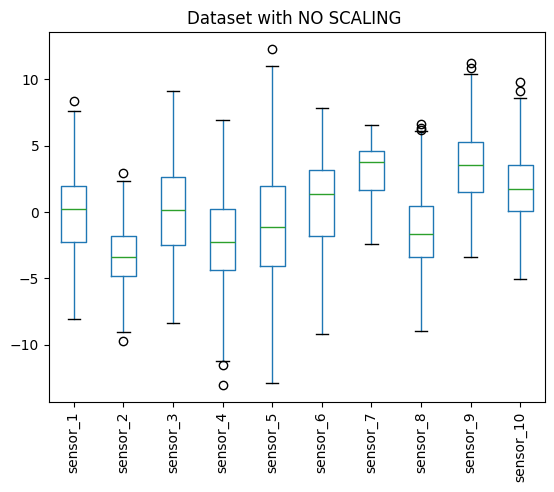

In [ ]:
# read a CSV dataset
dataset= pd.read_csv('wearable_sensors.csv')  # Example: sep=',' for comma-separated values can be used

print(dataset.head())
print("###########################################################")
print("the shape of the dataset is: " , dataset.shape)  # This should now show 400 rows and 10 columns


ax = dataset.boxplot(rot=90, grid=False)
plt.title('Dataset with NO SCALING ')
plt.show()

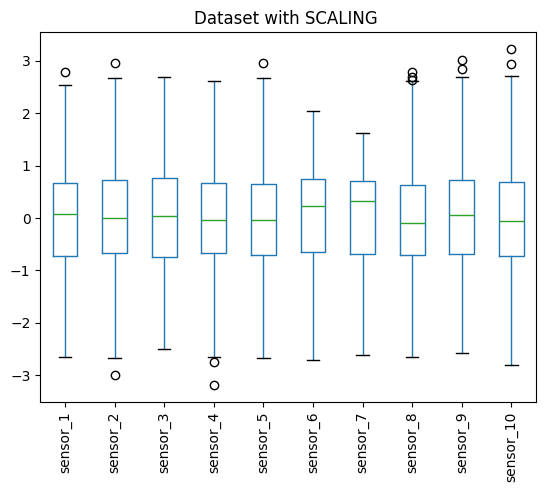

In [ ]:
scaler = StandardScaler()
#numpy format
dataset_scaled = scaler.fit_transform(dataset) #Centered on the mean and scaled by the std


#Converto da numpy a df per usare .boxplot()
df_dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

ax = df_dataset_scaled.boxplot(rot=90, grid=False)
plt.title('Dataset with SCALING ')
plt.show()

In [ ]:
#perfoms PCA
pca_dataset_scaled = PCA(random_state=42)
dataset_scores = pca_dataset_scaled.fit_transform(dataset_scaled) #effettuo PCA su dataset scalato e proietto il dataset originale sul nuovo spazio della pca =scores

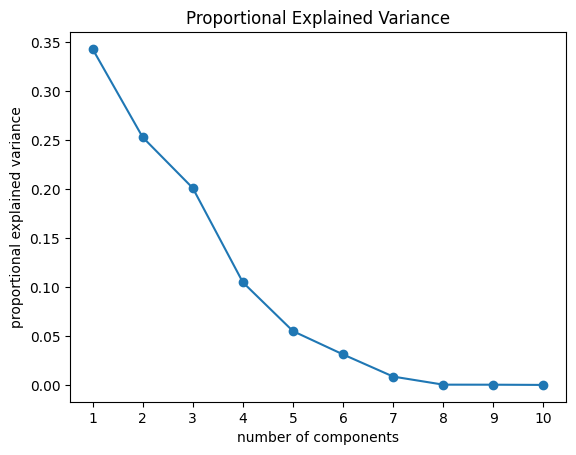

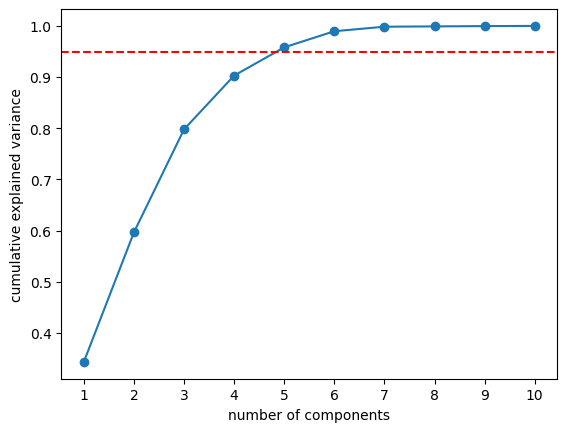

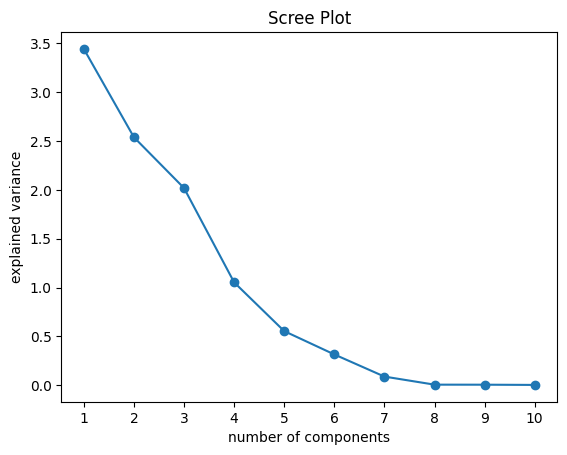

In [ ]:
pca_dataset_scaled = PCA(random_state=42)
pca_dataset_scaled.fit_transform(dataset_scaled)
#plot of explained variance = (variance_j_component)/total_variance (j=1,..k)

num_comp = pca_dataset_scaled.n_components_ #numero di componenti principali
plt.plot(range(1,num_comp+1),pca_dataset_scaled.explained_variance_ratio_,marker='o')
plt.xlabel('number of components')
plt.ylabel('proportional explained variance')
plt.xticks(range(1,num_comp+1))
plt.title('Proportional Explained Variance')
plt.show()

#plot of CUMULATIVE explained variance
plt.plot(range(1,num_comp+1),np.cumsum(pca_dataset_scaled.explained_variance_ratio_),marker='o')
# --- THIS IS THE ADDED LINE for the 0.95 threshold ---
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(range(1,num_comp+1))
plt.show()

#SCREE PLOT = plot of the variances
plt.plot(range(1,num_comp+1),pca_dataset_scaled.explained_variance_,marker = 'o')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Scree Plot')
plt.xticks(range(1,num_comp+1))
plt.show()

#chooce n-components to reach % level of variance

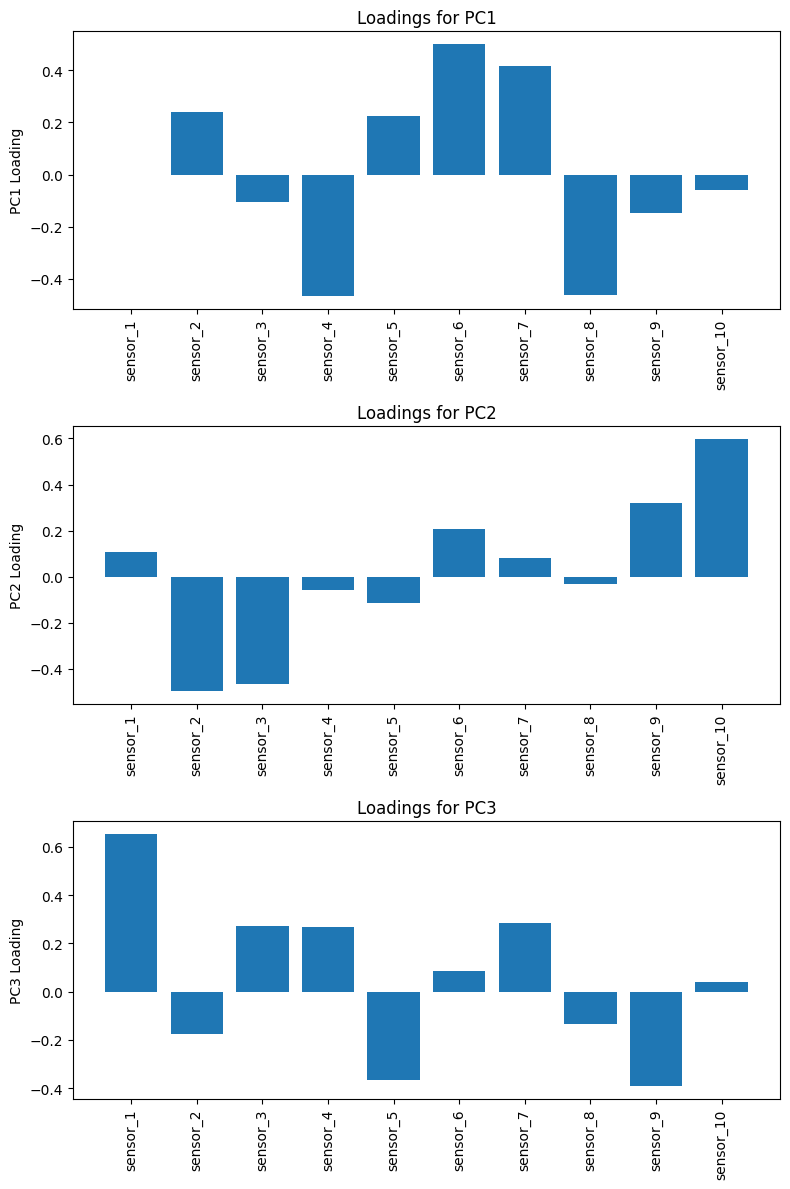

In [ ]:
loadings_matrix = pca_dataset_scaled.components_.T #matrices of the EIGENVECTORS of the covariance matrix

#RMK_ the j-column of the matrix rapresents the j-principal component

#Barplots of loadings for the first n PCs
n = 3
fig, axes = plt.subplots(n, 1, figsize=(8, 12))

for i, ax in enumerate(axes):
    ax.bar(dataset.columns, loadings_matrix[:, i]) #estraggo la componente principale i-esima (tutti i loadings)
    ax.set_xticklabels(dataset.columns, rotation=90)
    ax.set_ylabel(f"PC{i+1} Loading")
    ax.set_title(f"Loadings for PC{i+1}")

plt.tight_layout()
plt.show()

#Commento: i valori dei loadings piu alti rappresentano le variabili che spiegano meglio la varianza per la rispettiva componente principale

Segno positivo (+): La variabile originale e la componente principale sono correlate positivamente. Quando il valore del sensore aumenta, aumenta anche il valore (lo "score") della componente.

Segno negativo (-): La variabile originale e la componente principale sono correlate negativamente. Quando il valore del sensore aumenta, il valore della componente diminuisce.

In [ ]:
#PCA with num comps to reach 95% of variance
#take the projected dataset in the PCA space using n_components

num_components = 4 #i.e. using 4 components that explain 95% variance in this ex.

pca_n_components = PCA(n_components = num_components, random_state=42)
projected_dataset  = pca_n_components.fit_transform(dataset_scaled) #dataset projected to n principal components of the PCA

# CLUSTERING - Hierarchical

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform, cdist
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() #dataset containing vector of features and labels
X = iris.data #features vector
y = iris.target #label

In [ ]:
#Calculate the distance metrics of the dataset

#distance matrix between each point d(xi,xj) using euc distance dij​= sqrt(k=1->p)∑​(xik​−xjk​)^2)
X_distance_euc = pdist(X, metric='euclidean')
plt.imshow(squareform(X_distance_euc), aspect='equal')
plt.title("Euclidean Distance Matrix for dataset X")
plt.xlabel("i")
plt.ylabel("j")
plt.show()

#in this case the matrix is divided into blocks of same colours meaning that we can have 2/3 clusters
#(1st cluster for obs 0-40 is clearly evident)
#2-3 clusters (60-100,100-140 are more close to each others)

In [ ]:
#Agglomerative Hierarchical Clusterings:

#AGGLOMERATIVE: we start with n point (clusters), and every step we merge 2 clusters in 1 according to a linkage-method

dendrogram_single = linkage(X_distance_euc, method='single') #single  distance => minimum distance between the points of the two clusters
dendrogram_average = linkage(X_distance_euc, method='average') #distance of the centroids
dendrogram_complete = linkage(X_distance_euc, method='complete') #complete dist => max dist of the 2 most far away points

In [ ]:
# Plot dendrograms: starting from n points clusters we merge every time two clusters depending on the linkage method that we use
fig, axs = plt.subplots(1, 3, figsize=(18,6))
dendrogram(dendrogram_single, ax=axs[0], no_labels=True)
axs[0].set_title("Euclidean-Single")
dendrogram(dendrogram_complete, ax=axs[1], no_labels=True)
axs[1].set_title("Euclidean-Complete")
dendrogram(dendrogram_average, ax=axs[2], no_labels=True)
axs[2].set_title("Euclidean-Average")
plt.show()


# Plot the dendrogram
plt.figure(figsize=(10, 5))  # Adjust size if needed
dendrogram(dendrogram_average, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Euclidean - Average)")
plt.show()

Looking to the 3 dendograms we can understand that, with an appropiate cut:

Euclidean-Single spots 2 cluster
Euclidean-Complete /Average spors 2/3 clusters depending on the cut



In [ ]:
#taglio il dendogram per ottenre num_clusters

#Ottengo le labels del clusters
num_clusters = 2 #scelgo quanti clusters tenere dal dendogram

cluster_es = cut_tree(dendrogram_single, n_clusters=num_clusters).flatten()
cluster_ec = cut_tree(dendrogram_complete, n_clusters=num_clusters).flatten()
cluster_ea = cut_tree(dendrogram_average, n_clusters=num_clusters).flatten()

In [ ]:
#Internal Metrics : WSS,BSS
def compute_internal_measures(x, merges, k_values):
    wss_values = {}
    bss_values = {}

    overall_mean = np.mean(x, axis=0)  # Compute global mean

    for k in k_values:
        clustering = fcluster(merges, k, criterion='maxclust')
        # computes centroids for all clusters
        centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
        cluster_sizes = [len(x[clustering==c]) for c in range(1,k+1)]
        # computes the euclidean distance between each point and each centroid
        D = cdist(x, centroids, 'euclidean')
        # find nearest centroid for each point
        cIdx = np.argmin(D,axis=1)
        # store the distances to the nearest centroid
        d = np.min(D,axis=1)

        # WSS
        wss = sum(d**2)

        # BSS
        bss = np.sum([size * np.sum((centroid - overall_mean) ** 2) for size, centroid in zip(cluster_sizes, centroids)])

        wss_values[k] = wss
        bss_values[k] = bss
    return wss_values,bss_values

In [ ]:
#Plot WSS,BSS in funzione del numero di clusters
k_values = range(1,20)
wss_dict, bss_dict = compute_internal_measures(X, dendrogram_single, k_values) #uso il dendogramma con single linkage
wss_values = [wss_dict[x] for x in range(1,20)]
bss_values = [bss_dict[x] for x in range(1,20)]
fig = plt.figure(figsize=(8,6))
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

In [ ]:
# Create a DataFrame from the features (X)
X_df = pd.DataFrame(X, columns=iris.feature_names)

# Add the cluster labels (using the lables from single linkage with k=2 clusters "cluster_es" for example)
X_df['Cluster'] = cluster_es

# Melt the DataFrame to long format for plotting
X_melted = pd.melt(X_df, id_vars='Cluster', var_name='Attribute', value_name='Value')

# Plot the snake plot
plt.title('Snake plot of standardized variables')
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=X_melted)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Cluster');
plt.show()

In [ ]:
#Silhouette index for hierarchical clusterings

#Ottengo le labels del clusters
num_clusters = 2
cluster_es = cut_tree(dendrogram_single, n_clusters=num_clusters).flatten()

#Hierarchical=> using SINGLE linkage
cluster_average_labels = cluster_es

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_average_labels)
print("For n_clusters =", num_clusters,"The average silhouette_score for Hierarchical is :", silhouette_avg)

#The higher Sil , the better cluster

# CLUSTERING - Kmeans

In [ ]:
#Libraries
from sklearn.cluster import KMeans

In [ ]:
#dataset
from sklearn.datasets import load_iris
iris = load_iris() #dataset containing vector of features and labels
X = iris.data #features vector

In [ ]:
#fit kmeans

K = 2 #fixed a priori the numclusters
kmeans_result = KMeans(n_clusters=K, random_state=42).fit(X)
print("K-means clusters :\n", kmeans_result.labels_)
print("K-means centers:\n", kmeans_result.cluster_centers_)

K-means clusters :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
K-means centers:
 [[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


In order to chooce the optimal K , We can use WSS and BSS or a combination of them called variability ratio:

Variability ratio=WSS/(WSS+BSS)

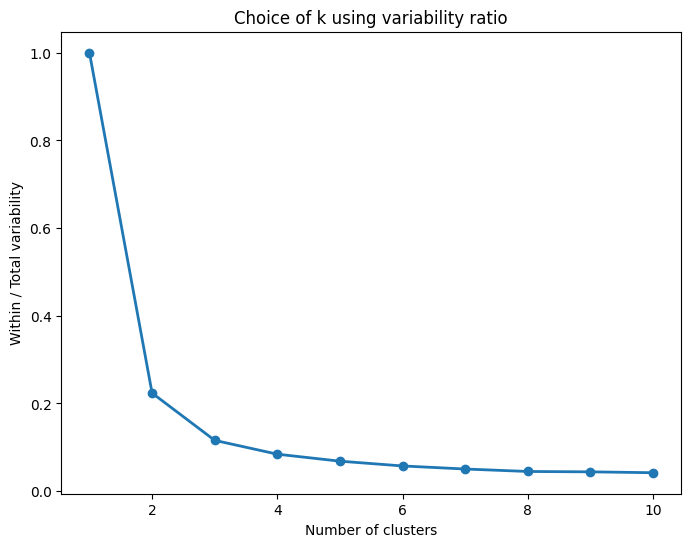

In [ ]:
#Variability Ratio (looks for minimal => elbow method)
w = []
b = []

#X must be already a numpy matrix
totss = np.sum((X - X.mean(axis=0))**2)

# try num of clusters= 1,3,...10

for k_val in range(1, 11):
    km = KMeans(n_clusters=k_val, random_state=42).fit(X)
    withinss = km.inertia_ # WSS
    between_ss = totss - withinss
    w.append(withinss)
    b.append(between_ss)
ratio = np.array(w) / (np.array(w) + np.array(b))
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), ratio, marker='o', linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Within / Total variability")
plt.title("Choice of k using variability ratio")
plt.show()

In [ ]:
#chooce the best K

#Il punto in cui la derivata è massima (maggiore variazione di WSS)

K_optimal = 3
kmeans_optimal = KMeans(n_clusters=K_optimal, random_state=42).fit(X)

In [ ]:
#Silhouette scores when number of cluster varies
from sklearn.metrics import silhouette_score
# Initialize the clusterer with optimal num of clusters
# seed of 10 for reproducibility.
cluster = KMeans(n_clusters=K_optimal, random_state=10)
cluster_labels = cluster.fit_predict(X) #obtain the labels of the clusters

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =",K_optimal,
          "The average silhouette_score is :", silhouette_avg)

NameError: name 'K_optimal' is not defined

In [ ]:
#fit kmeans_++ (centroids init with most far away points)

# Fit K-Means with k-means++ initialization
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=12, n_init=1)
kmeans_plus.fit(X)
clusters_plus = kmeans_plus.predict(X)

In [ ]:
#compare clustering with and WITHOUT PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#create a simulated dataset
np.random.seed(42)
num_customers = 500

data = {
    'account_balance': np.random.normal(5000, 2000, num_customers),
    'credit_card_usage': np.random.normal(2000, 800, num_customers),
    'loan_amount': np.random.normal(10000, 5000, num_customers),
    'investment_value': np.random.normal(15000, 7000, num_customers),
    'transaction_frequency': np.random.randint(1, 50, num_customers),
    'monthly_deposits': np.random.normal(3000, 1000, num_customers),
}

df = pd.DataFrame(data)

# Standardize the dataframe
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters_pca = kmeans.fit_predict(pca_data)

df['Cluster'] = clusters

# Apply K-Means clustering on original high-dimensional data
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters_original = kmeans_original.fit_predict(scaled_data)

# Compute silhouette scores for comparison
silhouette_pca = silhouette_score(pca_data, clusters_pca) #clustering PCA
silhouette_original = silhouette_score(scaled_data, clusters_original) #clustering NO PCA
print("Silhouette score with PCA:", silhouette_pca)
print("Silhouette score without PCA:", silhouette_original)

K-means is able to recognize globular shape datasets NOT ellptical ones.

In [ ]:
#ARI
# Compute Adjusted Rand Index (ARI)
from sklearn.metrics import adjusted_rand_score

# Apply K-Means clustering
kmeans_iris = KMeans(n_clusters=K_optimal, random_state=42)
predicted_labels_kmeans = kmeans_iris.fit_predict(X)

true_labels_iris = iris.target


ari_kmeans = adjusted_rand_score(true_labels_iris, predicted_labels_kmeans)
print("Adjusted Rand Index (ARI) for K-Means:", ari_kmeans)

# CLUSTERING - GMM

Gaussian Mixture Model

In [ ]:
#Library
from sklearn.mixture import GaussianMixture

In [ ]:
#dataset
from sklearn.datasets import load_iris
iris = load_iris() #dataset containing vector of features and labels
X = iris.data #features vector

In [ ]:
# Fit GMM with 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster assignments and probabilities
clusters_gmm = gmm.predict(X) #cluster labels (choosen the cluster with highest prob)
probabilities = gmm.predict_proba(X) #probabilities for each point to belong to clusters

In [ ]:
#Selecting the optimal number of components using BIC score
#we look for the GMM model with minimal BIC

bic_scores = []
num_comp_max = 10
n_components_range = range(1, num_comp_max + 1) #try 1 to 10 components

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

optimal_bic = min(bic_scores)
optimal_n_components = bic_scores.index(optimal_bic) + 1

#then re_fit the optimal GMM
gmm_optimal = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=42)
cluster_gmm_labels = gmm_optimal.fit_predict(X)

# Clustering - ARI_index



The Adjusted Rand Index (ARI) measures the similarity between two clusterings while correcting for random chance. It is defined as:

ARI

    If the clustering perfectly matches the ground truth, ARI=1.
    If the clustering is random, ARI≈0.
    If clustering is worse than random, ARI<0 (rare).



In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Apply K-Means clustering

cluster = KMeans(n_clusters=3, random_state=10) #same comp as gmm
cluster_kmeans= cluster.fit_predict(X) #obtain the labels of the clusters with kmeans

# Fit GMM with 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

#ARI gmm vs kmeans
ari_gmm_vs_kmeans = adjusted_rand_score(cluster_kmeans, clusters_gmm)
print("Adjusted Rand Index (ARI) between K-Means and GMM:", ari_gmm_vs_kmeans)

# Classification: LDA

when using LDA we assume that the class distributions are distributed as a Normal sharing the same covariance matrix aamong all the classes(each class has its own mean), while in QDA each class has its own covariance matrix together with its own mean.


LDA => Linear Decision Boundaries

QDA => Quadratic Decision Boundaries

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, bartlett, f_oneway, norm
from scipy.stats import multivariate_normal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

In [ ]:
#dataset
cyto = pd.read_csv("cytokines.txt", sep=" ")

print(cyto)

In [ ]:
#Since LDA and QDA rely on the fact that data are distributed normally we do some tests:

# Shapiro test for seeing if the two groups of data A (class 1) and B (class 2) can come from the normal distribution

# We separate groups A and B:
A_idx = cyto.index[ cyto["group"] == 'A' ]
B_idx = cyto.index[ cyto["group"] == 'B' ]

Infg = cyto["Infg"].values
IL5  = cyto["IL5"].values
groups = cyto["group"].values

stat_A, pval_A = shapiro(Infg[A_idx])
stat_B, pval_B = shapiro(Infg[B_idx])
print("Shapiro test group A:", stat_A, pval_A)
print("Shapiro test group B:", stat_B, pval_B)

# Bartlett test for equality of variance to see if it's more appropiate LDA or QDA (different variance for each class)
bart_stat, bart_pval = bartlett(Infg[A_idx], Infg[B_idx])
print("Bartlett test: statistic =", bart_stat, "p-value =", bart_pval)

Interpretazione dei p-value:

    p > 0.05 → Non si rifiuta l'ipotesi nulla: distribuzione compatibile con la normalità.

    p ≤ 0.05 → Si rifiuta l'ipotesi nulla: distribuzione non normale.

In [ ]:
#In questo caso è opportuno assumere EQUAL VARIANCE => LDA

# Raccogli i dati delle feature (X) e le labels (y) dal dataset cyto
X = cyto[["Infg", "IL5"]]  # features
y = cyto["group"] #labels

#fit in the LDA model without any given priors
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

#predict training set
y_pred = lda.predict(X)

#plot confusion matrix
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#given the confusion matrix we can compute the APER
#apparent error rate, as proportion of the misclassified on the total
misclassified = confusion_matrix(y, y_pred).sum() - np.diag(confusion_matrix(y, y_pred)).sum()
total = confusion_matrix(y, y_pred).sum()

aper = misclassified / total

print(aper)

In [ ]:
#setting specific priors
lda_1 = LinearDiscriminantAnalysis(priors=[0.75, 0.25]) #setting the prob of the prior Explictly instead of the frequentistic estimate
lda_1.fit(X, y)


#predict
y_pred_mypriors = lda_1.predict(X)

#plot confusion matrix
sns.heatmap(confusion_matrix(y, y_pred_mypriors), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#given the confusion matrix we can compute the APER
#apparent error rate, as proportion of the misclassified on the total
misclassified = confusion_matrix(y, y_pred_mypriors).sum() - np.diag(confusion_matrix(y, y_pred_mypriors)).sum()
total = confusion_matrix(y, y_pred_mypriors).sum()

aper = misclassified / total

print(aper)

In [ ]:
#linear_boundary_class_k = w_k ^ T x + c_k
#dove la dimensione dei coeff w è pari al numero di features e per ogni classe avrò un'intercetta
print("Coefficients of linear discriminants:\n", lda.coef_) # wkj for each label k: p (num features) coeff wk
print("Intercepts:\n", lda.intercept_) #ck for each label

#in totale avrò: g (num_tot_classi) * p (num_covariates) coefficienti
#                g intercette

# Estrai i coefficienti (pesi delle rette) e gli intercepts
coefficients = lda.coef_
intercepts = lda.intercept_

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

NameError: name 'lda' is not defined

In [ ]:
#Plot of linear boundaries
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
#Start with the multivariate case, p = num_variables, g = num_groups
iris_data = load_iris()
X = iris_data.data[:, :2]  # only Sepal.Length, Sepal.Width p = 2
y = iris_data.target       # 0, 1, 2 for setosa, versicolor, virginica g = 3
species_names = iris_data.target_names

#fit in the LDA model without any given priors
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

#predict
y_pred = lda.predict(X)

coefficients = lda.coef_
intercepts = lda.intercept_


def plot_lda_partition(model, X, y, class_labels=None, title="LDA Partition"):
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
  grid_points = np.c_[xx.ravel(), yy.ravel()]

  unique_classes = np.unique(y)
  n_classes = len(unique_classes)
  cmap = plt.get_cmap("brg", n_classes)

  class_pred = model.predict(grid_points)

  plt.figure()
  plt.scatter(X[:,0], X[:,1], c=y, cmap='brg', s=30)
  plt.title("Iris LDA Partition")
  # Now let's draw boundaries where the predicted class changes:
  class_pred_matrix = class_pred.reshape(xx.shape)
  # We'll plot the contour lines between classes:
  # e.g., any place that transitions from class i to j is a boundary.
  plt.contour(xx, yy, class_pred_matrix,
              colors='k', linestyles='--')

  # Mark class means (model.means_ shape: [n_classes, n_features])
  means = model.means_
  plt.scatter(means[:,0], means[:,1], marker='x',
              c=range(len(means)), cmap='brg', s=100, linewidths=2)

  if class_labels is None:
      class_labels = [f"Class {cls}" for cls in unique_classes]  # Default labels if not provided

  handles = [mpatches.Patch(color=cmap(i), label=class_labels[i]) for i in range(n_classes)]
  plt.legend(handles=handles, loc='upper right')

  plt.xlabel("Sepal.Length")
  plt.ylabel("Sepal.Width")
  plt.show()

plot_lda_partition(lda, X, y, class_labels=species_names, title="LDA Partition")


# Classification: QDA

QDA: assumes that each class has its own covariance matrix. Quadratic decision boundaries

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, bartlett, f_oneway, norm
from scipy.stats import multivariate_normal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.datasets import load_iris
#Start with the multivariate case, p = num_variables, g = num_groups
iris_data = load_iris()
X = iris_data.data[:, :2]  # only Sepal.Length, Sepal.Width p = 2
y = iris_data.target       # 0, 1, 2 for setosa, versicolor, virginica g = 3
species_names = iris_data.target_names

In [ ]:
#Fitting QDA without specific prior
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

y_pred = qda.predict(X)

sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#given the confusion matrix we can compute the APER
#apparent error rate, as proportion of the misclassified on the total
misclassified = confusion_matrix(y, y_pred).sum() - np.diag(confusion_matrix(y, y_pred)).sum()
total = confusion_matrix(y, y_pred).sum()

aper = misclassified / total

print(aper)

In [ ]:
import matplotlib.patches as mpatches # Import mpatches

#Plot the quadratic boundaries provided by QDA
def plot_qda_partition(model, X, y, class_labels=None, title="QDA Partition", cmap=None,xtitle="Feature1",ytitle="Feature2"):
    if cmap is None:
        cmap = plt.get_cmap("brg", 3)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    class_pred = model.predict(grid_points)
    if isinstance(class_pred[0], str):
      class_pred = np.array([np.where(class_labels == i) for i in class_pred])
    class_pred_matrix = class_pred.reshape(xx.shape)

    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    cmap = plt.get_cmap("brg", n_classes)

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, s=30)
    plt.title(title)
    plt.contour(xx, yy, class_pred_matrix,
                colors='k', linestyles='--')

    # Mark class means
    means = model.means_
    plt.scatter(means[:,0], means[:,1], marker='x',
                c=range(len(means)), cmap=cmap, s=100, linewidths=2)

    if class_labels is None:
        class_labels = [f"Class {cls}" for cls in unique_classes]  # Default labels if not provided

    handles = [mpatches.Patch(color=cmap(i), label=class_labels[i]) for i in range(n_classes)]
    plt.legend(handles=handles, loc='upper right')

    plt.xlabel("Sepal.Length")
    plt.ylabel("Sepal.Width")
    plt.show()

plot_qda_partition(qda, X,y, class_labels=species_names, title="Iris QDA Partition")

# Fisher Discrimant Analysis

LDA can also be used to project the data into a lower dimensional space, which maximizes the SEPARABILITY between the classes

In [ ]:
from sklearn.datasets import load_iris
#Start with the multivariate case, p = num_variables, g = num_groups
iris_data = load_iris()
X_iris = iris_data.data[:, :2]  # only Sepal.Length, Sepal.Width p = 2
y_iris = iris_data.target       # 0, 1, 2 for setosa, versicolor, virginica g = 3
species_names = iris_data.target_names
X = X_iris
y = y_iris

# Apply Fisher's Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)  # Transform data into canonical coordinates X_lda (to maximizes the separability)


To predict the label of a new point we can calculate for each class the centroid, and assign the label that has the closest centroid w.r.t to the new point projected into the LDA space (from the original space)

In [ ]:
x_new = np.array([[5.85, 2.90]])  # New observation
cc_new = lda.transform(x_new)  # Project into Fisher’s space and then see to which centroid is closest to.

import numpy as np

labels = np.unique(y)  # es. [0, 1, 2] per Iris
centroids = np.array([X_lda[y == label].mean(axis=0) for label in labels]) #calcolo centroidi

#assegno il punto (in LDA space) al centroide con distanza minima


from scipy.spatial.distance import cdist
# 3. Distanza ai centroidi
dists = cdist(cc_new, centroids)  # shape (1, 3)

# 4. Predizione: classe più vicina
predicted_class_idx = np.argmin(dists)
predicted_class = species_names[predicted_class_idx]

# Output
print("Nuovo punto (originale):", x_new)
print("Punto nello spazio LDA:", cc_new)
print("Distanze ai centroidi:", dists)
print("Classe predetta:", predicted_class)


# K-Neareast Neighbour

Calcola la distanza tra il punto da classificare e tutti i punti nel dataset di training (di solito si usa la distanza euclidea, ma può variare).

Ordina i punti del training in base alla distanza crescente.

Prende i primi k punti più vicini (i “k vicini”).

Guarda la classe di appartenenza di ciascuno di questi k punti.

Conta le frequenze delle classi e assegna al nuovo punto la classe più frequente tra i vicini.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Start with the multivariate case, p = num_variables, g = num_groups
iris_data = load_iris()
X_iris = iris_data.data[:, :2]  # only Sepal.Length, Sepal.Width p = 2
y_iris = iris_data.target       # 0, 1, 2 for setosa, versicolor, virginica g = 3
species_names = iris_data.target_names


# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_iris, y_iris)

y_pred = knn.predict(X_iris)

conf_matrix = confusion_matrix(y_iris, y_pred)

# Compute APER (Apparent Error Rate)
aper = 1 - accuracy_score(y_iris, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nApparent Error Rate (APER): {:.4f}".format(aper))

#SUPERVISED LEARNING

In [ ]:
# Funzione per calcolare metriche di valutazione del modello
def get_model_stats(y_true, y_pred, p):
    # y_true: I valori veri della variabile target (ground truth).
    # y_pred: I valori predetti dal modello per la variabile target.
    # p: Il numero di parametri nel modello (inclusa l'intercetta).

    n = len(y_true)
    # n: Numero di osservazioni nel dataset.

    rss = np.sum((y_true - y_pred) ** 2)
    # rss: Sum of Squared Residuals (Somma dei Quadrati dei Residui). Misura la somma delle differenze al quadrato tra i valori veri e i valori predetti.

    mse = rss / n
    # mse: Mean Squared Error (Errore Quadratico Medio). È la media dei quadrati degli errori.

    aic = n * np.log(mse) + 2 * p
    # aic: Akaike Information Criterion. Una misura della bontà di adattamento di un modello statistico che penalizza la complessità del modello.

    bic = n * np.log(mse) + p * np.log(n)
    # bic: Bayesian Information Criterion. Simile all'AIC, ma con una penalità maggiore per il numero di parametri.

    return aic, bic
    # La funzione ritorna i valori di AIC e BIC calcolati.

In [ ]:
def get_model_adj_r2(y_true, y_pred, p):
    rss = np.sum((y_true - y_pred) ** 2)
   # Calculate R-squared
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (rss / tss)

    n = len(y_true)
    # n: Numero di osservazioni nel dataset.

    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return adjusted_r2

# Linear Regression

In [2]:
#Libraries
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [ ]:
#Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df

In [ ]:
#Divide between numerical and categorical variables
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

In [ ]:
#simple OLS fit (given as granted the LR hypothesis)

X = df[num_vars].drop('bmi', axis=1)
y = df['bmi'] #target variable

X = sm.add_constant(X) #add the intercept beta_0

ols = sm.OLS(y, X)
ols_results = ols.fit()
print(ols_results.summary())

*Commenti sui test statistici*:

1. Le variabili con P-values elevati (> 0.05) hanno POCA relevanza statistica (i.e. age,serum sodium)

2. Il p-value di F-statistics è molto basso (circa 0.0) percio rifiuto ipotesi che tutti i veri parametri siano 0.

In [ ]:
#fitting the training set
y_pred = ols_results.predict(X) # predictions over the training set: (y_pred == fitted)

mse = mean_squared_error(y,y_pred)

print(f'MSE: {mse:.4f}')

In [ ]:
#Plot the regression Line of a simple model
# P = 1 (only 1 variable); y = b0 + b1x1 + e

X = df['ejection_fraction'].values.reshape(-1,1)
y = df['bmi'].values

# Add a constant to the features matrix for the intercept
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

X_plot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
X_plot = sm.add_constant(X_plot)
y_plot = results.predict(X_plot)
sns.relplot(x="ejection_fraction", y="bmi", palette="muted",
            height=6, data=df)
sns.lineplot(x=X_plot[:,1],y=y_plot,color='red')

INTERVALS

Confidence Interval: with prob (1-alpha) to have an interval s.t the theoretical AVERAGE result of the prediction y* related to x*

Prediction Interval: i want the interval for the single obs y* related to x* (so we have additional uncertanty related to the error epsilon). (LARGER INTERVAL, since a signle obs has more variability w.r.t the average of all obs)


In [ ]:
#Confidence and Prediction Intervals
#p = 1
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_const = sm.add_constant(X_plot)

# Predict with confidence intervals
predictions = results.get_prediction(X_plot_const)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% intervals

# Extract the values
y_pred = summary_frame['mean']
ci_lower = summary_frame['mean_ci_lower']
ci_upper = summary_frame['mean_ci_upper']
pi_lower = summary_frame['obs_ci_lower']
pi_upper = summary_frame['obs_ci_upper']

plt.figure(figsize=(10, 6))
#adjust the X and y variables
sns.scatterplot(x=df['ejection_fraction'], y=df['bmi'], label='Data', color='black')
plt.plot(X_plot, y_pred, color='red', label='Regression Line')
plt.fill_between(X_plot.flatten(), ci_lower, ci_upper, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(X_plot.flatten(), pi_lower, pi_upper, color='orange', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('Ejection Fraction')
plt.ylabel('BMI')
plt.title('Linear Regression with Confidence and Prediction Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Measure of FIT
#COMPUTE MSE AND R^2 ON DATA

X = df['ejection_fraction'].values.reshape(-1,1)
y = df['bmi'].values

# Add a constant to the features matrix for the intercept
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

y_pred = results.predict(X)
r2 = r2_score(y,y_pred)
print(r2)

In [ ]:
#Spli Train-Test set:
from sklearn import model_selection

# Remove 'bmi' from the num_vars list for use as features
features_num = [var for var in num_vars if var != 'bmi'] #bmi == TARGET var

# Combine the modified numerical features with the categorical features
all_features = features_num + cat_vars

X = df[all_features]  # Features
y = df['bmi']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)

train_index = X_train.index
test_index = X_test.index

#evaluate R2 on training vs test set on the NUMERICAL VAR
X_train = X_train[features_num]
X_test = X_test[features_num]

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

results = sm.OLS(y_train, X_train).fit()
y_pred_train = results.predict(X_train)
y_pred_test = results.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 train: {r2_train:.4f}')
print(f'R2 test: {r2_test:.4f}')

Una differenza sostanziale tra R2 train e R2 test indica OVERFITTING.

In [ ]:
#Categorical Variables

#IMPORTANT RMK: standardization applies ONLY to NUMERICAL VARIABLES, it makes no sense to standardize categorical variables.

print(cat_vars)
#for each  categorical variable I need to encode K-1 dummys where K is the number of categories per variable
#in this case they are all binary so i will have one dummy var per categorical variable

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False) # for each categorical var that has K categories, choose reference category (first one) => create K-1 cols where each col k is Dik= 1 if Di belogns to the k-category
encoded_feature = encoder.fit_transform(df[cat_vars])

df_encoded = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(cat_vars))

df_encoded = pd.concat([df.drop(cat_vars, axis=1), df_encoded], axis=1)
df_encoded

num_variables = ['ejection_fraction']
cat_variables = ['DEATH_EVENT_True'] #1 hot encoded of the original Death_event

X_train_9_num = X_train[num_variables]
X_test_9_num = X_test[num_variables]

#changing the intercept B0 for each possible value of the categorical variable (ex Di_death = 1, then intercept = B0 + B_death)
X_train_9_cat = df_encoded.loc[train_index, cat_variables]
X_test_9_cat = df_encoded.loc[test_index, cat_variables]


# Concatenate the features with the one-hot encoded categorical variable
X_train_9 = np.concatenate([X_train_9_num, X_train_9_cat], axis=1)
X_test_9 = np.concatenate([X_test_9_num, X_test_9_cat], axis=1)

cols = num_variables + cat_variables
X_train_9 = pd.DataFrame(X_train_9, index=train_index, columns=cols)
X_test_9 = pd.DataFrame(X_test_9, index=test_index, columns=cols)

#adding the constant
X_train_9 = sm.add_constant(X_train_9)
X_test_9 = sm.add_constant(X_test_9)

model = sm.OLS(y_train, X_train_9)
results = model.fit()
print(results.summary())

#In case of Death Event = 1:
    # The intercept is b0 + b1
#else
    # The intercept is b0

###################

COLLINEARITY, VIF

The Variance Inflation Factor (VIF) indicates how good a variable can be predicted from the others

A high VIF means there is collinearity with some other variable

Rule of thumb: VIF > 5 for a variable is problematic


In [ ]:
#COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = num_vars.copy()
variables.remove('bmi') #target removed

X_train_2 = X_train[variables]

data = X_train_2
data = sm.add_constant(data)

vif_data = pd.DataFrame()
vif_data["Variable"] = data.columns

vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

In case of some VIF > 5 better to remove the variable we could have problem of linear dep.



COMMENTO: Il VIF è una misura di correlazione che coinvolge piu di una variabile percio è molto piu esaustiva della matrice di correlazione di pearson che misura la correlazione lineare di una COPPIA di variabili. VIF puo catturare una situazione del genere A = 3B + 4C + 7D -4F quindi è molto piu esaustiva. con VIF > 5 una variabile è considerata collineare con altre.



#######################################


SCALING

Numerical variables having different scales are often problematic. Many models have their coefficients' computation affected by this, but while this is not the case of linear regression with least square method, it is still useful to standardize the features for interpretability of coefficients and to reduce the condition numer when it is not due to a direct multicollinearity among the variables. The VIF is scale invariant, but the condition number is not.

Moreover, this is necessary when penalizations are introduced in linear regression models (more on this in the next lectures)

To standardize a variable x:

z=x−μσ


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

#RMK Variables to be scaled are only NUMERICAL

X_train_2 = X_train[variables]
X_test_2 = X_test[variables]

scaler = StandardScaler()
X_train_2_scaled = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns, index=X_train_2.index)
X_test_2_scaled = pd.DataFrame(scaler.transform(X_test_2), columns=X_test_2.columns, index=X_test_2.index)

#after the scaling add the constant
X_train_2_scaled = sm.add_constant(X_train_2_scaled)
X_test_2_scaled = sm.add_constant(X_test_2_scaled)

model = sm.OLS(y_train, X_train_2_scaled)
results = model.fit()
print(results.summary())

###############
COMMENTO:   Cond. No.                         1.44 very low after scaling (good)

#######################



POLYNOMIAL FEATURES


bmi=β0+β1⋅ef+β2⋅(ef)^2+ϵ , taking ef^2

In [ ]:
#POLYNOMIAL FEATURES
from sklearn.preprocessing import PolynomialFeatures
variables = ['ejection_fraction'] #our x

X_train_6 = X_train[variables] #RMK: X_train already contains the col of 1
X_test_6 = X_test[variables]

polynomial2 = PolynomialFeatures(degree=2, include_bias=True) #polynomial features up to degree = 2(includes: b0+b1*x+b2*X^2)

#polynomial features up to degree = 2(include)
X_train_6 = polynomial2.fit_transform(X_train_6)
X_test_6 = polynomial2.fit_transform(X_test_6)

scaler = StandardScaler() #SCALING via Z-score

# Scale everything except the constant term (column index 0)
# since we have already add the constant column ,instead of before scaling and then adding columns of all 1's, we need to not consider first col when scaling.
X_train_6[:, 1:] = scaler.fit_transform(X_train_6[:, 1:])
X_test_6[:, 1:] = scaler.transform(X_test_6[:, 1:])

# Convert to DataFrame, maintaining the column names
cols = ['const', 'ef', 'ef^2']
#cols = polynomial2.get_feature_names_out()
X_train_6 = pd.DataFrame(X_train_6, columns=cols, index=train_index)
X_test_6 = pd.DataFrame(X_test_6, columns=cols, index=test_index)

#remember that after the square of covariate 'ef' we have perfomed the scaler so ef^2 is scaled by its mean and std_dev
X_train_6

#fitting the poly model
model = sm.OLS(y_train, X_train_6)
results = model.fit()
print(results.summary())

y_train_pred = results.predict(X_train_6)
y_test_pred = results.predict(X_test_6)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R2 train: {r2_train:.4f}')
print(f'R2 test: {r2_test:.4f}')

###################################################

DIAGNOSTICS : testing if our working hp of linear regression holds

In [ ]:
#Diagnostics

variables = ['ejection_fraction', 'serum_creatinine']

X_train_5 = X_train[variables]
X_test_5 = X_test[variables]
X_train_5 = sm.add_constant(X_train_5)
X_test_5 = sm.add_constant(X_test_5)

model = sm.OLS(y_train, X_train_5)
results = model.fit()
print(results.summary())

#1.) No autocorrelazione tra i residui
from statsmodels.stats.stattools import durbin_watson
print(" Test indipendenza residui : ",durbin_watson(results.resid))  #Durbin-Watson Test: Testare l’autocorrelazione(INDIPENDENZA) dei residui​.

#Il test restituisce una statistica solitamente tra 0 e 4 [0-2 autocorrelazione ;2 okay (INDIPENDENZA); 2-4 autocorellazione]



#2.) Linearity

#This assumption means that the relationship between the independent variables and the dependent variable is linear. That is, the expected change in the dependent variable is proportional to the change in an independent variable

#3.)  Homoscedasticity

#This means the residuals have constant variance across all levels.

#We can visually inspect the residuals :
fitted_vals = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1.5})  # Add a smooth trendline

plt.axhline(0, color='black', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Linearity & Homoscedasticity Check')
plt.show()

Commento Residuals vs Fitted

Media dei residui pari a zero: i residui devono avere una distribuzione centrata attorno a zero, senza deviazioni sistematiche.

Omoschedasticità: la varianza dei residui deve rimanere costante lungo tutto il range dei valori predetti. Non devono essere presenti “a imbuto” (eteroschedasticità) o altri pattern riconoscibili.

L’assunzione di linearità nel modello richiede che la linea rossa (smoothed line dei residui) non presenti trend sistematici, come curvature o andamenti non lineari. Nel grafico fornito, la linea rossa si mantiene abbastanza vicina e regolare rispetto alla linea teorica orizzontale a zero (media dei residui), senza pattern evidenti. Pertanto, l’assunzione di linearità risulta ragionevolmente soddisfatta.

In [ ]:
#4 hp) opzionale ma fondmanetale per fare testing
# residui siano IID gaussiani di media 0 e varianza uguale
import scipy.stats as stats

#We can do via testing or...
#other way to assess the gaussianity by a graphical approach.
#Just few points violate the gaussianity, so we can restore the gaussianity assumption
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()

#Almost all the points fit the lines, so our assumption of Gaussianity still holds.



# In case you dont have the points distributed as the line above for gaussian residuals => Transform Y
# ex i)
#y_train_10 = np.sqrt(y_train)
#y_test_10 = np.sqrt(y_test)

#ex ii)
#y_train_10 = np.log(y_train + 1)
#y_test_10 = np.log(y_test + 1)


#model = sm.OLS(y_train_10, X_train_5)
#results_new = model.fit()
#print(results.summary())

# Penalized Linear Regression => Shrinkage Method


Ridge Regression:

$$
\hat{\beta} = \underset{\beta}{\arg \min} \left( \sum_{i=1}^n (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^p \beta_j^2 \right)
$$

Lasso Regression:
$$
\hat{\beta} = \underset{\beta}{\arg \min} \left( \sum_{i=1}^n (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^p |\beta_j| \right)
$$

In [ ]:
#load Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df

In [ ]:
#numerical variables in the df
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
#categorical variables in the df
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [ ]:
help(Ridge)

In [ ]:
#ONLY RIDGE IN THIS CASE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Define X and y
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure',
        'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'bmi', 'time',
        'DEATH_EVENT']]
y = df['ejection_fraction']

# Feature groups
numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction') #target
categorical_vars = cat_vars.copy()

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])
#Standardization is MANDATORY for penalized regressions,
#in the pre processing step we both include standardization of numerical features + 1-hot encoding for categorical variables

# Pipelines
ols_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=100))  # Adjust alpha as desired, alpha is directly what we usually call lmbda when we use Ridge() clss
])

# Fit models
ols_pipeline.fit(X, y)
ridge_pipeline.fit(X, y)

# Predictions
y_pred_ols = ols_pipeline.predict(X)
y_pred_ridge = ridge_pipeline.predict(X)

# Feature names
feature_names = ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Coefficients
ols_coefs = ols_pipeline.named_steps['regressor'].coef_
ridge_coefs = ridge_pipeline.named_steps['regressor'].coef_

# Intercepts
ols_intercept = ols_pipeline.named_steps['regressor'].intercept_
ridge_intercept = ridge_pipeline.named_steps['regressor'].intercept_

# Combine into one DataFrame
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(feature_names),
    'OLS': [ols_intercept] + list(ols_coefs),
    'Ridge': [ridge_intercept] + list(ridge_coefs)
})

# Evaluation metrics
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    n, p = len(y_true), len(feature_names)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return {
        'Adj R^2': adj_r2,
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

metrics_df = pd.DataFrame([
    {'Model': 'OLS', **evaluate(y, y_pred_ols)},
    {'Model': 'Ridge', **evaluate(y, y_pred_ridge)}
])

# Display results
print("Coefficient Comparison:")
print(coef_df)

print("\nPerformance Metrics:")
print(metrics_df)

##############################

Commento: Ridge aiuta il modello ad evitare overfitting, Lasso effettua una naturale variable selection.

# Variable Selection for LR

In [ ]:
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split

#load Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df

#numerical variables in the df
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
#categorical variables in the df
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction')
categorical_vars = cat_vars.copy()

X = df[numeric_vars + categorical_vars]
y = df['ejection_fraction'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Preprocessing (Scaling numerical var, one hot encoder for categorical)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test) #mean and std dev of the TRAINING set
feature_names = preprocessor.get_feature_names_out()
n = len(y_test)

print("le dimensioni del dataset di training completo sonp: ",X_train_proc.shape)

# Helper for metrics computation
def get_model_stats(y_true, y_pred, p, mse_full):
    rss = np.sum((y_true - y_pred) ** 2)
    mse = rss / len(y_true)
    aic = n * np.log(mse) + 2 * p
    bic = n * np.log(mse) + p * np.log(n)
    cp = rss / mse_full - n + 2 * p
    return aic, bic, cp

# Full model (OLS)
start = time.time()
ols_model = LinearRegression().fit(X_train_proc, y_train)
train_rss_full = np.sum((y_train - ols_model.predict(X_train_proc)) ** 2)
mse_full = train_rss_full / len(y_train)
y_pred_ols = ols_model.predict(X_test_proc)
aic_ols, bic_ols, cp_ols = get_model_stats(y_test, y_pred_ols, X_test_proc.shape[1] + 1, mse_full)
time_ols = time.time() - start

# Best Subset Selection => I compare all the possible models according to all possible sets of variables (2^P) (In this case we do for 2^10 p = 10)
#You need to provide the score to compare all the models.We measure the performance of the model on the VALIDATION set (actually we are doing CROSS VALIDATION)
#In cross validation we use K-1 folds to do both variable selection and training, and the last fold to evaluate the reduced model ypu have obtained
start = time.time()
efs = ExhaustiveFeatureSelector(LinearRegression(), min_features=1, max_features=10, scoring='r2', cv=5)
efs.fit(X_train_proc, y_train)
best_subset_idx = list(efs.best_idx_)
model_best = LinearRegression().fit(X_train_proc[:, best_subset_idx], y_train)
y_pred_best = model_best.predict(X_test_proc[:, best_subset_idx])
aic_best, bic_best, cp_best = get_model_stats(y_test, y_pred_best, len(best_subset_idx) + 1, mse_full)
time_best = time.time() - start


#GREEDY HEURISTICS:
# Forward Selection: Starting from 1 Variable (Bj) and picking the one with the best performance and i add it, then i repeat by adding a new variable
#Once you have selected a variable to be added you can't remove it from your model.
start = time.time()
sfs_forward = SequentialFeatureSelector(LinearRegression(), direction='forward', cv=5, scoring='r2') #we use the metric r2 to evaluate the best model
sfs_forward.fit(X_train_proc, y_train)
fmask = sfs_forward.get_support()
model_fwd = LinearRegression().fit(X_train_proc[:, fmask], y_train)
y_pred_fwd = model_fwd.predict(X_test_proc[:, fmask])
aic_fwd, bic_fwd, cp_fwd = get_model_stats(y_test, y_pred_fwd, sum(fmask) + 1, mse_full)
time_fwd = time.time() - start

# Backward Elimination: Starting from the full model and eliminating one variable at time.
# IF p > n YOU CANT DO BACKWARD SELECTION
# if p is really high, you cant fit the model due to computational aspect of matrices

#    Parti con tutte le feature.

    #Consideri, una per una, cosa succede se ne rimuovi una. Usi cross-validation per vedere quanto il tuo modello è capace a predirre.

    #Per ogni rimozione possibile:

        #Fai cross-validation (CV) con le feature senza quella specifica da voler rimuovere.

        #Da ogni K-1 fold estrai il r2 valutato su k fold(validation set) e calcoli la media di tutti i R² ottenuti sui fold di CV → chiamiamolo R² medio.

    #Confronti tutti gli R² medi ottenuti rimuovendo una feature alla volta.

    #Togli la feature la cui rimozione dà il miglior (più alto) R² medio.

start = time.time()
sfs_backward = SequentialFeatureSelector(LinearRegression(), direction='backward', cv=5, scoring='r2')
sfs_backward.fit(X_train_proc, y_train)
bmask = sfs_backward.get_support()
model_bwd = LinearRegression().fit(X_train_proc[:, bmask], y_train)
y_pred_bwd = model_bwd.predict(X_test_proc[:, bmask])
aic_bwd, bic_bwd, cp_bwd = get_model_stats(y_test, y_pred_bwd, sum(bmask) + 1, mse_full)
time_bwd = time.time() - start

# Compile metrics
metrics_df = pd.DataFrame([
    {'Model': 'OLS (All)', 'AIC': aic_ols, 'BIC': bic_ols, "Cp": cp_ols, 'Time (s)': time_ols},
    {'Model': 'Best Subset', 'AIC': aic_best, 'BIC': bic_best, "Cp": cp_best, 'Time (s)': time_best},
    {'Model': 'Forward Selection', 'AIC': aic_fwd, 'BIC': bic_fwd, "Cp": cp_fwd, 'Time (s)': time_fwd},
    {'Model': 'Backward Selection', 'AIC': aic_bwd, 'BIC': bic_bwd, "Cp": cp_bwd, 'Time (s)': time_bwd}
])


# Display
print("\n\nModel Comparison (AIC, BIC, Cp, Time):")
print(metrics_df)

print("\nSelected Features:")
print('Best subset:\n')
print(feature_names[best_subset_idx])
print('\nForward selection:\n')
print(feature_names[fmask])
print('\nBackward selection:\n')
print(feature_names[bmask])


#0 is the complete model
#1 is the Best subset
#...

le dimensioni del dataset di training completo sonp:  (239, 12)


Features: 4082/4082



Model Comparison (AIC, BIC, Cp, Time):
                Model         AIC         BIC         Cp   Time (s)
0           OLS (All)  311.992624  339.219103  18.644882   0.057618
1         Best Subset  298.664518  309.136241   5.042223  87.249378
2   Forward Selection  302.294563  316.954975   8.703882   1.628229
3  Backward Selection  302.294563  316.954975   8.703882   0.984673

Selected Features:
Best subset:

['num__age' 'cat__anaemia_1' 'cat__sex_Male' 'cat__DEATH_EVENT_True']

Forward selection:

['num__age' 'num__creatinine_phosphokinase' 'num__time' 'cat__anaemia_1'
 'cat__sex_Male' 'cat__DEATH_EVENT_True']

Backward selection:

['num__age' 'num__creatinine_phosphokinase' 'num__time' 'cat__anaemia_1'
 'cat__sex_Male' 'cat__DEATH_EVENT_True']


# VARIABLE SELECTION using LASSO (both for linear reg and Logistic reg)

In [ ]:
#load Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df

In [ ]:
#numerical variables in the df
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
#categorical variables in the df
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [ ]:
#Lasso variable selection

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#LASSO VARIABLE SELECTION IN LINEAR REGRESSION

# Define X and y
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure',
        'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'bmi', 'time',
        'DEATH_EVENT']]
y = df['ejection_fraction']

#NO CONSTANT TO BE ADDED => using lasso no beta_0 (intercept)

# Feature groups
numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction') #target
categorical_vars = cat_vars.copy()

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])
#Standardization is MANDATORY for penalized regressions,
#in the pre processing step we both include standardization of numerical features + 1-hot encoding for categorical variables

# Pipelines
ols_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.5))  # Adjust alpha as desired, alpha is directly what we usually call lmbda when we use Ridge() clss
])

# Fit models
ols_pipeline.fit(X, y)
lasso_pipeline.fit(X, y)

# Predictions
y_pred_ols = ols_pipeline.predict(X)
y_pred_lasso = lasso_pipeline.predict(X)

# Feature names
feature_names = lasso_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Coefficients
ols_coefs = ols_pipeline.named_steps['regressor'].coef_
lasso_coefs = lasso_pipeline.named_steps['regressor'].coef_

# Intercepts
ols_intercept = ols_pipeline.named_steps['regressor'].intercept_
lasso_intercept = lasso_pipeline.named_steps['regressor'].intercept_

# Combine into one DataFrame
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(feature_names),
    'OLS': [ols_intercept] + list(ols_coefs),
    'LASSO': [lasso_intercept] + list(lasso_coefs)
})

# Evaluation metrics
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    n, p = len(y_true), len(feature_names)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return {
        'Adj R^2': adj_r2,
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

metrics_df = pd.DataFrame([
    {'Model': 'OLS', **evaluate(y, y_pred_ols)},
    {'Model': 'Lasso', **evaluate(y, y_pred_lasso)}
])

# Display results
print("Coefficient Comparison:")
print(coef_df)

print("\nPerformance Metrics:")
print(metrics_df)

In [ ]:
#Lasso variable selection using a PENALIZED LOGISTIC REGRESSION
#report the top - 10 features according to Lasso

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#prepare the dataset
# Define X and y
numerical_vars = num_vars.copy()
categorical_vars = cat_vars.copy()

# Remove 'DEATH_EVENT' from categorical_vars list
categorical_vars = [var for var in categorical_vars if var != 'DEATH_EVENT']

X = df[numerical_vars + categorical_vars]
feature_names = X.columns
y = df['DEATH_EVENT']  # Dead = 1

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#NO CONSTANT TO BE ADDED => using lasso no beta_0 (intercept)

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])
#Standardization is MANDATORY for penalized regressions,
#in the pre processing step we both include standardization of numerical features + 1-hot encoding for categorical variables

alpha_opt = 1.0 #to be assigned


#penalty = 'l1' ==LASSO
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(penalty='l1',solver='liblinear',C=1/alpha_opt,max_iter=10000))  # Adjust C = 1/alpha as desired, alpha is directly what we usually call lmbda when we use Ridge() clss
])

lasso_pipeline.fit(X_train, y_train)

#pick the top 10 features according to Lasso
lasso_model = lasso_pipeline.named_steps['regressor']
lasso_coefs = lasso_model.coef_[0]
lasso_coefs_abs = np.abs(lasso_coefs)
sorted_idx_lasso = np.argsort(lasso_coefs_abs)[::-1]
sorted_features_lasso = np.array(feature_names)[sorted_idx_lasso]
print("top 10 - features ordered by importance discovered by LASSO : ", sorted_features_lasso[:10])

We are going to select only the features that have non zero coefficients after lasso regression

# LOGISTIC REGRESSION

It's used when the target of the model is a Bernulli

In [ ]:
#Libraries
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')

In [ ]:
df

In [ ]:
variables = ['age', 'bmi', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'ejection_fraction', 'time'] #target of the model is excluded
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

In [ ]:
#prepare the dataset and the target
X = df[variables]
y = df['DEATH_EVENT'] #the target is a bernulli variable {1,0}  1=> DEATH, 0=> LIVE

# model P(yi=1) = pi

#for the metrics i will need discrete labels yi_hat = 1 (if pi_hat>th)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234) #split df into train-test

train_index = X_train.index
test_index = X_test.index

In [ ]:
#Fitting a logistic regression
X_train_1 = X_train[num_vars]
X_test_1 = X_test[num_vars]

#adding the intercpt
X_train_1 = sm.add_constant(X_train_1)
X_test_1 = sm.add_constant(X_test_1)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_1).fit() # since the Beta are fitted via iterative methods like gradient ascent/descent/ can happen that either
                                               # it doesnt find the optimal beta or worse, it doesn't converge.

print(logit_model.summary())
#i can still have the p-values for each of the coeff Betaj

Commento: We still have p-values to estimate the statistical relevance of our variables.

RMK: if beta_j > 0 , adding + 1 into the covariate Xj it INCREASES the odds (meaning higher prob of having y = 1)


######
minor:

Statsmodels compute the pseudo R^2 statistics using the McFadden's definition:

pseudoR2: It has values from 0 to 1 and it indicates the goodness of the model, but it's not the primary metric used to evaluate LR models


#################################

COMMENTO ODDS_RATIO:
In a logistic model, the effect of the coefficient is different from a linear regression model. A k-unit increase in $x_j$ increases the risk by a factor of $exp(k \cdot \hat{\beta_j})$. Odds ratios are defined as:

$$
OR_j = exp(\hat{\beta_j})
$$

In [ ]:
#odds ratio and coeffs:
coef = logit_model.params
odds_ratios = np.exp(coef) #we are looking for the odds ratio. Meaning that increasing the j covariate  is increasing e^beta_j>1 (or decreasing if e^beta_j <1) the P(y=1).

conf = logit_model.conf_int()
conf.columns = ['2.5%', '97.5%']
conf = np.exp(conf)  # Exponentiate to get ORs' CIs

#it's possible to have the confidence interval for every odds ratio
or_summary = pd.DataFrame({
    "Coefficient": coef,
    "Odds Ratio": odds_ratios,
    "2.5% CI OR": conf['2.5%'],
    "97.5% CI OR": conf['97.5%']
})

print(or_summary)

#every unit of increase of age (beta_age > 0 = 0.05), corresponds to an higher probability to have y = 1  of 5 % (odds ratio = 1.05)
#every unit of increasing of time (beta_time < 0 = -0.21 ), corresponds to DECREASING the odds to have y = 1 of 2%

#Sort by odds ratio for better visualization
or_summary = or_summary.sort_values(by="Odds Ratio", ascending=False)

fig, ax = plt.subplots(figsize=(8, len(or_summary) * 0.6))

# Plot the OR as points
ax.errorbar(or_summary['Odds Ratio'], or_summary.index,
            xerr=[or_summary['Odds Ratio'] - or_summary['2.5% CI OR'], or_summary['97.5% CI OR'] - or_summary['Odds Ratio']],
            fmt='o', color='darkblue', ecolor='lightgray', elinewidth=3, capsize=4)

# Add a vertical line at OR = 1 (no effect)
ax.axvline(1, color='red', linestyle='--')

# Set labels
ax.set_xlabel("Odds Ratio (log scale)")
ax.set_title("Forest Plot of Odds Ratios with 95% CI")
ax.set_xscale("log")  # Log scale for better visualization

plt.show()

COMMENTO FIGURA:

Prendendo le *odds ratio* in scala logaritmica, ciò che viene mostrato in figura corrisponde direttamente al valore del coefficiente \( \beta_j \).


Infatti, dato che:  
$$
\text{odds} = e^{\beta_j}
$$  
applicando il logaritmo si ottiene:  
$$
\log(\text{odds}) = \beta_j
$$

Pertanto, ogni coefficiente $$( \beta_j > 0) $$implica un **aumento** delle odds, mentre $$( \beta_j < 0)$$ implica una **diminuzione**.


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pred_prob = logit_model.predict(X_test_1)
# Convert from probabilities to binary outcomes based on a threshold t
threshold = 0.5
y_test_pred_class = (pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_test_pred_class)

class_names = ['Survived', 'Dead']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

[ TP , FN

  FP, TN ]

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob) #plotting TPR vs FPR by varying the threshold t:
                                                  # for example i can choose : threshold = 0.5
                                                  #                            y_test_pred_class = (y_test_pred_prob > threshold).astype(int)
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve")

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Chance")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classification")
plt.legend(loc="lower right")
plt.show()

#compute auc
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_test_pred_prob) #compute the integral under the ROC curve.
print(f"ROC-AUC Score on Test Set: {auc_score}")

NameError: name 'y_test_pred_prob' is not defined

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$
$$Precision = \frac{TP}{TP+FP}$$
$$Recall = Sensitivity = \frac{TP}{TP+FN}$$
$$\text{F1-Score} = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$
$$Specificity = \frac{TN}{TN+FP}$$ (spec =recall of the other class)

In [ ]:
#Metrics
from sklearn.metrics import classification_report
#you need discrete labels (convert p to y)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred_class, target_names=['Survived', 'Dead']))


#compute spec from the confusion matrix
tn,fp,fn,tp = cm.ravel()
spec = tn / (tn+fp) #just the recall of the negative class
print("Spec:" ,spec)

In [ ]:
#Choice of an optimal threshold t
optimal_threshold_1 = 1 - df['DEATH_EVENT'].mean() # 1 - % of positive samples
y_test_pred_class = (pred_prob > optimal_threshold_1).astype(int) #new labels with the optimal t

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_test_pred_class))

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred_class, target_names=['Survived', 'Dead']))

# MULTICLASS LOGISTIC REGRESSION

In [ ]:
#Libraries
import statsmodels.api as sm

In [ ]:
# Dataset
# Categorize the numerical 'ejection_fraction' variable into an ordered categorical variable
df['ef_cat'] = pd.cut(
    df['ejection_fraction'],
    bins=[0, 40, 50, 100],
    labels=['reduced', 'mildly reduced', 'preserved']
)

# We are converting this numerical feature into a categorical one with 3 classes defined by the 'labels'.
# Now we want to build a Multiclass Logistic Regression to classify 'ef_cat'.

# If we want to specify the baseline category explicitly (e.g. for regression or encoding),
# we can define the variable as an ordered categorical and specify the desired order:
# Here, 'mildly reduced' will act as the reference/baseline if we encode it accordingly.
df['ef_cat'] = pd.Categorical(df['ef_cat'],
                              categories=['mildly reduced', 'preserved', 'reduced'],
                              ordered=True) #MILDLY-REDUCED is used as the reference cat (K non directly fitted the parameters for that class), obtained as p = 1-sum(other_classes_probabilities)


# Apply one-hot encoding to the categorical variables listed in 'cat_vars'
# Note: drop_first=True drops the first category alphabetically by default,
# so if you want a specific baseline (e.g. 'mildly reduced'), make sure it's first in the category list
# or manage the encoding manually.
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True, dtype=int)

df_encoded

In [ ]:
#split Train and Test set
X = df_encoded[['age', 'bmi', 'serum_sodium', 'serum_creatinine', 'diabetes_1', 'sex_Male', 'smoking_1', 'high_blood_pressure_1', 'anaemia_1']]
y = df_encoded['ef_cat']  # Multiclass target variable (K = 3 classes)

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

model = sm.MNLogit(y_train, X_train)  # Create the model instance
result = model.fit()  # Fit the model
print(result.summary())

#having K-categories , we are going to fit K-1 sets of parameters BETA.
##We exepct (K-1)sets of p (beta)parameters each

In [ ]:
#Probabilities prediction and labels
pred_prob = result.predict(X_test)  # Returns a set of K probabilities for each yi we have (p1,..,pK)
pred_prob

#we have K probabilities for each sample
#To convert the prob into discrete output, you just pick the class with the highest prob
pred_prob.rename(model._ynames_map, axis='columns', inplace=True)

y_test_pred_class = pred_prob.idxmax(axis=1) #for each sample, assign the class with maximum probability


#CONF. MATRIX (K x K)
cm = confusion_matrix(y_test, y_test_pred_class, labels=list(model._ynames_map.values()))

class_names = model._ynames_map.values()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#auc-roc

#1.) single auc roc
# Compute ROC AUC for each class (one-vs-all)
roc_auc_scores = {}
for i in (pred_prob.columns):
    roc_auc = roc_auc_score(y_test == i, pred_prob.loc[:, i])  # Treat class i as positive (1), all the other classes to 0
    roc_auc_scores[i] = roc_auc

# Output the ROC AUC scores
for class_name, auc in roc_auc_scores.items():
    print(f'ROC AUC for {class_name}: {auc:.2f}')

#Aggregated AUC-ROC (3 ways)

print("aggregated auc-roc")

y_test = y_test.map({'reduced': 0, 'mildly reduced': 1, 'preserved': 2})
pred_prob.rename(columns={'reduced': 0, 'mildly reduced': 1, 'preserved': 2}, inplace=True)

roc_auc_micro = roc_auc_score(y_test, pred_prob, average='micro', multi_class='ovr')
print(f'Micro-average ROC AUC: {roc_auc_micro:.2f}') #aggregated metrics for all classes

roc_auc_micro = roc_auc_score(y_test, pred_prob, average='macro', multi_class='ovr')
print(f'Macro-average ROC AUC: {roc_auc_micro:.2f}') #average of individual metrics

roc_auc_micro = roc_auc_score(y_test, pred_prob, average='weighted', multi_class='ovr')
print(f'Weighted-average ROC AUC: {roc_auc_micro:.2f}')

# K_fold CROSS-VALIDATION

In [3]:
#Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [4]:
#Load df
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


In [ ]:
#prepare dataset
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

# Feature groups
numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction')
categorical_vars = cat_vars.copy()

# Define features and target
X = df[numeric_vars + categorical_vars] #num + cat
y = df['ejection_fraction'] #target

In [ ]:
#ESTIMATE OF THE TEST ACCURACY

# Preprocessing step => scaling of numerical features + one hot
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])

# Full pipeline: you should include EVERYTHING IN CROSS_VALIDATION
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#At every training fold (K-k) we must apply the pipeline.
#Scaling is a part of training so it must be done during cross validation
#same if we should include variable selection in the fold

# Define scoring metrics
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

# K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=123)

print(f"\n {k}-Fold Cross-Validation:")
kfold_results = {}
for metric, scorer in scoring.items():
    scores = cross_val_score(pipeline, X, y, scoring=scorer, cv=kf)
    kfold_results[metric] = (np.mean(scores), np.std(scores))
    print(f"{metric}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")
# Plot
plt.figure(figsize=(10, 6))
for i, (name, scores) in enumerate(kfold_results.items()):
    plt.errorbar(i, np.mean(scores), yerr=np.std(scores), fmt='o', capsize=5, label=name)

plt.xticks(range(len(kfold_results)), list(kfold_results.keys()))
plt.ylabel('Score')
plt.title(f'{k}-Fold Cross-Validation Metrics (Mean ± Std)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#CROSS_VALIDATION FOR HYPERPARAMTERS OPT.

#SIMPLE O.L.S + RIDGE /LASSO (Penalized Linear Regression)

#CROSS validation is also used to do hyperparameters optimization.
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Ridge Pipeline with GridSearch using CV to chooce the best alpha
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor), #already defined the preoprocessing step
    ('regressor', Ridge())
])
ridge_params = {'regressor__alpha': np.logspace(-3, 3, 50)}
#cv using K = 5
ridge_cv = GridSearchCV(ridge_pipeline, ridge_params, cv=5,scoring='r2') #chooces the best alpha according to r^2
# will select the alpha that maximizes the R2 score across the cross-validation folds.

ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_['regressor__alpha'])
opt_aplha = ridge_cv.best_params_['regressor__alpha']

#now re-fit the whole model using the optimal alpha
ridge_optimal = Ridge(alpha=opt_aplha)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ridge_optimal)
])
model.fit(X_train, y_train)

#now evaluate the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE on Test Set:", mse)

# NESTED CV

    Outer loop (model evaluation):

    Split the full dataset into K folds

    For each of the K iterations:
        Use K-1 folds for training
        Use 1 fold for validation (hold-out)

        Inner loop (model selection):
          On the training data of the outer loop (K-1 folds):
            Perform cross-validation to find the best hyperparameter (e.g., best alpha for Lasso)
            Select the optimal alpha_k

      Train the model using the optimal alpha_k on the K-1 folds

      Evaluate on the held-out fold from the outer loop



In [ ]:
from sklearn.model_selection import cross_validate

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [col for col in num_vars if col != 'ejection_fraction']),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_vars)
])

# Define model search spaces
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
ridge_params = {'regressor__alpha': np.logspace(-3, 3, 50)}
ridge_nested = GridSearchCV(ridge_pipeline, ridge_params, cv=5) #for each of the training fold K-k uses CV to find the optimal alpha


# Outer CV for nested evaluation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate nested Ridge using the optimal alpha found by the nested CV
ridge_scores = cross_validate(ridge_nested, X, y, scoring=(
    'neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'), cv=outer_cv)

# Function to format and print results
def summarize_nested_cv(name, scores):
    print(f"\n {name} Nested Cross-Validation Results (5-Fold):")
    mse = -scores['test_neg_mean_squared_error']
    mae = -scores['test_neg_mean_absolute_error']
    r2 = scores['test_r2']

    print(f"  ▸ MSE   : Mean = {mse.mean():.3f}, Std = {mse.std():.3f}")
    print(f"  ▸ MAE   : Mean = {mae.mean():.3f}, Std = {mae.std():.3f}")
    print(f"  ▸ R²    : Mean = {r2.mean():.3f}, Std = {r2.std():.3f}")

# Print summaries
summarize_nested_cv("Ridge", ridge_scores)

# PENALIZED Logitistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [5]:
#Load df
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


In [6]:
#prepare dataset
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

# Feature groups
numeric_vars = num_vars.copy()
categorical_vars = cat_vars.copy()
categorical_vars.remove('DEATH_EVENT')

# Define features and target
X = df[numeric_vars + categorical_vars] #num + cat
y = df['DEATH_EVENT'] #Bernulli target

In [ ]:
help(LogisticRegression)

Best C for Logistic Regression (L2) RIDGE : 0.0517947467923121
Best C for Logistic Regression (L1) LASSO: 0.13894954943731375
Optimal alpha for Ridge: 19.306977288832506
Optimal alpha for Lasso: 7.196856730011521

 10-Fold Cross-Validation for RIDGE :
Accuracy: Mean = 0.833, Std = 0.051

 10-Fold Cross-Validation for LASSO :
Accuracy: Mean = 0.816, Std = 0.075


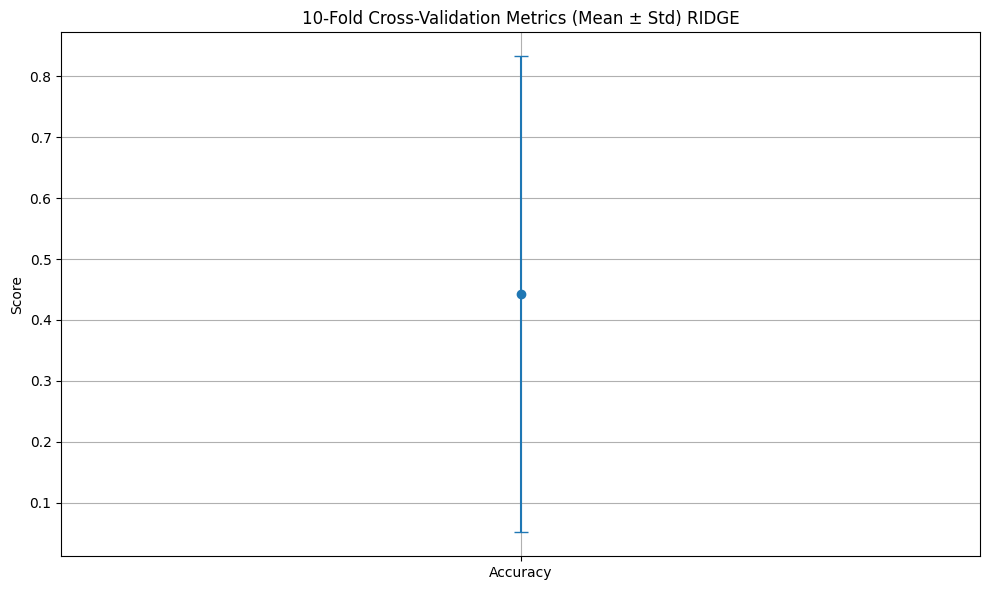

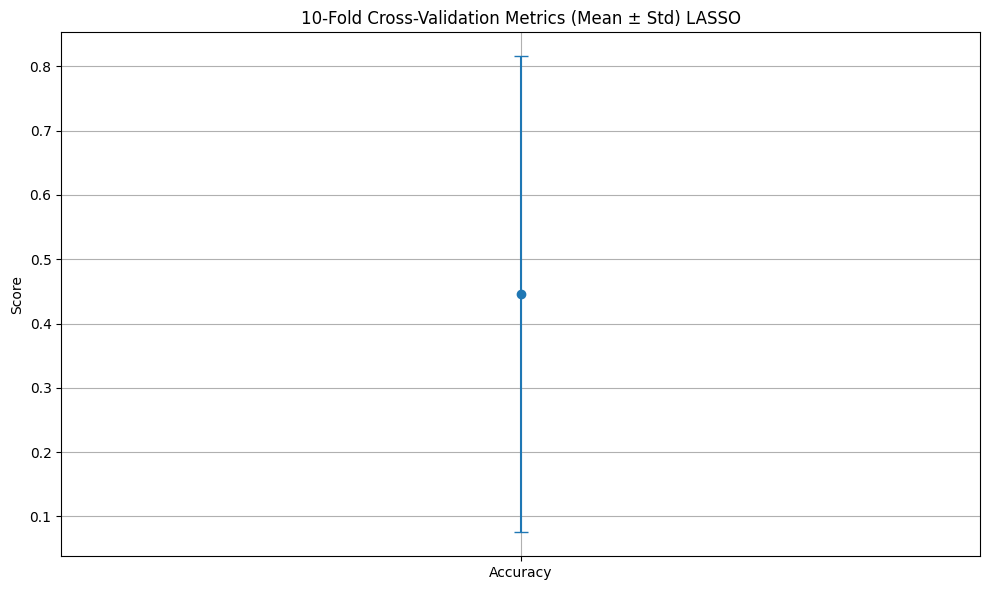

In [8]:
#FIND OPTIMAL ALPHA + EVALUATE THE TEST ERROR
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#NO CONSTANT SINCE PENALIZED METHODS



# Preprocessing => STANDARDIZATION IS MANDATORY
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', solver='liblinear',max_iter=1000))
])


lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))
])

#La cross validation puo essere usata anche come hyperparam optmization
#in this case based on the auc-roc we select the optimal alpha

#Nei modelli di regressione logistica di scikit-learn, si usa C come inverso della forza di regolarizzazione.
# C = 1/alpha
# Logistic Regression (L2)
logreg_l2_params = {'classifier__C': np.logspace(-3, 3, 15)}
#CV USING 10 FOLDS
logreg_l2_cv = GridSearchCV(ridge_pipeline, logreg_l2_params, cv=10, scoring='roc_auc')

#Nei modelli di regressione logistica di scikit-learn, si usa C come inverso della forza di regolarizzazione.
# C = 1/alpha

# Logistic Regression (L1)
logreg_l1_params = {'classifier__C': np.logspace(-3, 3, 15)}
#CV USING 10 FOLDS
logreg_l1_cv = GridSearchCV(lasso_pipeline, logreg_l1_params, cv=10 ,scoring='roc_auc')
# Fit models
logreg_l2_cv.fit(X_train, y_train)
logreg_l1_cv.fit(X_train, y_train)

print("Best C for Logistic Regression (L2) RIDGE :", logreg_l2_cv.best_params_['classifier__C'])
print("Best C for Logistic Regression (L1) LASSO:", logreg_l1_cv.best_params_['classifier__C'])

optimal_C_ridge = logreg_l2_cv.best_params_['classifier__C']
optimal_C_lasso = logreg_l1_cv.best_params_['classifier__C']

alpha_optimal_ridge = 1/optimal_C_ridge
alpha_optimal_lasso = 1/optimal_C_lasso

print("Optimal alpha for Ridge:", alpha_optimal_ridge)
print("Optimal alpha for Lasso:", alpha_optimal_lasso)

#Once i have the optimal alpha = 1/C i estimate the test error

# Full pipeline: you should include EVERYTHING IN CROSS_VALIDATION
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',LogisticRegression(penalty='l2', C = optimal_C_ridge ,solver='liblinear', max_iter=1000) )
])

pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(penalty='l1', C = optimal_C_lasso ,solver='liblinear', max_iter=1000) )
])

#At every training fold (K-k) we must apply the pipeline.
#Scaling is a part of training so it must be done during cross validation
#same if we should include variable selection in the fold

# Define scoring metrics
scoring = {'Accuracy': make_scorer(accuracy_score)}

# K-Fold Cross-Validation to estimate the test error on RIDGE
from sklearn.model_selection import cross_val_score, StratifiedKFold
k = 10
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=123) #using stratified because it's a logistic reg

print(f"\n {k}-Fold Cross-Validation for RIDGE :")
kfold_results = {}
for metric, scorer in scoring.items():
    scores = cross_val_score(pipeline_ridge, X, y, scoring=scorer, cv=kf)
    kfold_results[metric] = (np.mean(scores), np.std(scores))
    print(f"{metric}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")
# Plot
plt.figure(figsize=(10, 6))
for i, (name, scores) in enumerate(kfold_results.items()):
    plt.errorbar(i, np.mean(scores), yerr=np.std(scores), fmt='o', capsize=5, label=name)

plt.xticks(range(len(kfold_results)), list(kfold_results.keys()))
plt.ylabel('Score')
plt.title(f'{k}-Fold Cross-Validation Metrics (Mean ± Std) RIDGE')
plt.grid(True)
plt.tight_layout()

# K-Fold Cross-Validation to estimate the test error on LASSO
k = 10
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=123)

print(f"\n {k}-Fold Cross-Validation for LASSO :")
kfold_results = {}
for metric, scorer in scoring.items():
    scores = cross_val_score(pipeline_lasso, X, y, scoring=scorer, cv=kf)
    kfold_results[metric] = (np.mean(scores), np.std(scores))
    print(f"{metric}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")
# Plot
plt.figure(figsize=(10, 6))
for i, (name, scores) in enumerate(kfold_results.items()):
    plt.errorbar(i, np.mean(scores), yerr=np.std(scores), fmt='o', capsize=5, label=name)

plt.xticks(range(len(kfold_results)), list(kfold_results.keys()))
plt.ylabel('Score')
plt.title(f'{k}-Fold Cross-Validation Metrics (Mean ± Std) LASSO')
plt.grid(True)
plt.tight_layout()

# TREES

In [ ]:
#Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, classification_report
import pandas as pd

In [ ]:
#dataset
df = pd.read_csv('heart_failure_clinical_records_dataset_smhd.csv')
df
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

In [ ]:
#CROSS-VALIDATION to chooce the optimal alpha (therefore the optimal subtree)
#Find the optimal alpha via cross-validation
#CV : alpha_optimal => sub_tree_optimal
from sklearn.model_selection import cross_val_score

# Step 1: Get pruning path
clf = DecisionTreeClassifier(random_state=1234)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # skip the last one (trivial tree)

# Step 2: Train trees with different alphas + CV
clfs = []
cv_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    clfs.append(clf)
    cv_scores.append(scores.mean())

# Step 3: Select best alpha
best_idx = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_idx]
print(f"Best ccp_alpha: {best_alpha:.5f} with CV accuracy: {cv_scores[best_idx]:.4f}")

# Step 4: Retrain final model on full training set with best alpha
final_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_tree.fit(X_train, y_train)

# Evaluate on test set
test_acc = final_tree.score(X_test, y_test)
print(f"Test accuracy of pruned tree: {test_acc:.4f}")

# Step 5: Plot alpha vs. CV accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, cv_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Mean CV Accuracy")
plt.title("Selecting Optimal ccp_alpha via Cross-Validation")
plt.grid(True)
plt.show()

In [ ]:
#Simple decision tree visualization
#prepare dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Train decision tree using all features => CLASSIFICATION
clf = DecisionTreeClassifier(max_depth=3, random_state=42) #max depth is the number of levels to go down from the root (most critical hyperparam).
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:  {test_acc:.2f}")
print(classification_report(y_test, y_pred, target_names=target_names))

# Tree Visualization
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Trained on All Features")
plt.show()

In [ ]:
#Pruning
#PRUNING
#alpha is a shrinakge parameter on the depth of the subtree

#Evaluate different levels of tree complexity (via ccp_alpha) and see how they affect the model's test accuracy.
path = clf.cost_complexity_pruning_path(X_train, y_train) #set of aplhas at which at every alpha we reduce the depth by 1
alphas = path.ccp_alphas[:-1]  # skip last (trivial) tree

for alpha in alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    print(f"Alpha: {alpha:.5f} | Test Accuracy: {clf_pruned.score(X_test, y_test):.3f}")

#So you are finding values of alpha (penalization parameter for the max depth used to train the model) vs TEST ACCURACY
#this is the process to evaluate the best alpha that gives the best generalization (accuracy on unseen data) (and the best trade off of the depth)

In [ ]:
 #Random Forest  Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
#AVERAGING all the predictions from all the trees to reduce the variance of a new prediction / Num_trees

# Load data
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest
#rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42,oob_score=True) #Hyperparams: n_trees = n_estimators, depth, m (predictors)
rf = RandomForestClassifier(n_estimators=100, random_state=42,oob_score=True) #allow large sub tress
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the test accuracy using the obb score (no need of cross validation)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("OOB Score:", rf.oob_score_)

#each bagged tree only sees 2/3 n samples to build the tree, you the out of bag 1/3n to do a "free " MSE(validation) to estimate the test error

In [ ]:
#VARIABLE IMPORTANCE FOR RESULT Interpretability
import matplotlib.pyplot as plt

importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

#features_names da definire quando preparo dataset

#sorted_features = feature_names[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]
print("features ordered by importance: ", sorted_features)
sorted_importances = importances[sorted_idx]

# Seleziona tutte le feature se sono meno di 10, altrimenti solo le prime 10
n_features_to_plot = len(sorted_features) if len(sorted_features) < 10 else 10

plt.figure(figsize=(8, 6))
plt.barh(sorted_features[:n_features_to_plot], sorted_importances[:n_features_to_plot])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#Cross Validation to select the best hyperparameters in random forest (num_trees, num_predictors ==m, max_depth)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperarameter grid
param_grid = {
    'n_estimators': [10, 50, 100], #number of trees in the forest
    'max_depth': [None, 3, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # or you can use int values , these are the number of features to consider at each split for the tress
}
#ma_features = m = the amount of features each tree considers for the splits

# Setup grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.3f}")

# Test performance
y_pred = best_rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
#in a two classes pb i can plot the auc-roc

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) #Hyperparams: n_trees = n_estimators, depth, m (predictors)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
#plot the auc-roc
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
# ROC-AUC Curve
y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Best Random Forest Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
#GRADIENT BOOSTING (Regression) : build sequential trees to learn the residuals
from sklearn.ensemble import GradientBoostingRegressor

# Separate features/target
X = df.drop(columns='ejection_fraction')
y = df['ejection_fraction']

numeric_vars = num_vars.copy()
numeric_vars.remove('ejection_fraction')
categorical_vars = cat_vars.copy()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first'), categorical_vars)
])

# Pipeline with Gradient Boosting
# Next Tree is focused on learning the high residuals
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Adjusted R²
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = preprocessor.fit(X_train).transform(X_train).shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output
print(f"R²:        {r2:.3f}")
print(f"Adjusted R²:    {adj_r2:.3f}")
print(f"MSE:            {mse:.2f}")
print(f"MAE:            {mae:.2f}")
